<a href="https://colab.research.google.com/github/Mostak-Ahmmed/Data-Mining/blob/main/CLP_3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
data = {
    'Pregnancies': [6, 1, 8],
    'Glucose': [148, 85, 183],
    'BP': [72, 66, 0],
    'SkinThickness': [35, 29, 0],
    'Insulin': [0, 0, 0],
    'BMI': [33.6, 26.6, 23.3],
    'Age': [50, 31, 32],
    'Outcome': [1, 0, 1]
}

df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,0,0,0,23.3,32,1


In [ ]:
replace = ['Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI']

for col in replace:
    median = df[col].replace(0, np.nan).median()
    df[col] = df[col].replace(0, median)

df['Insulin'] = df['Insulin'].fillna(0)

df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0.0,33.6,50,1
1,1,85,66,29,0.0,26.6,31,0
2,8,183,69,32,0.0,23.3,32,1


In [ ]:
import matplotlib.pyplot as plt

df0 = df[df['Outcome'] == 0]
df1 = df[df['Outcome'] == 1]

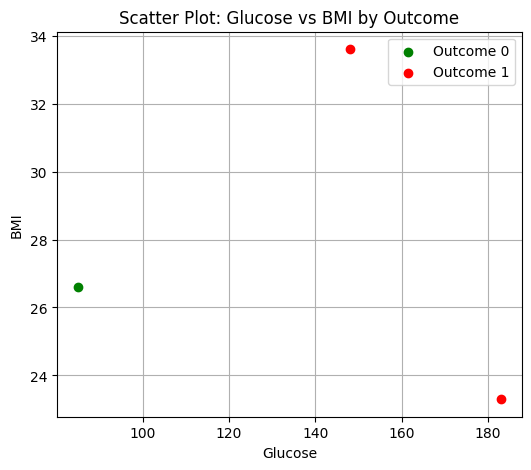

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df0['Glucose'], df0['BMI'], color='green', label='Outcome 0')
plt.scatter(df1['Glucose'], df1['BMI'], color='red', label='Outcome 1')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot: Glucose vs BMI by Outcome')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
mscaler = MinMaxScaler()
X_train = mscaler.fit_transform(X_train)
X_test = mscaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



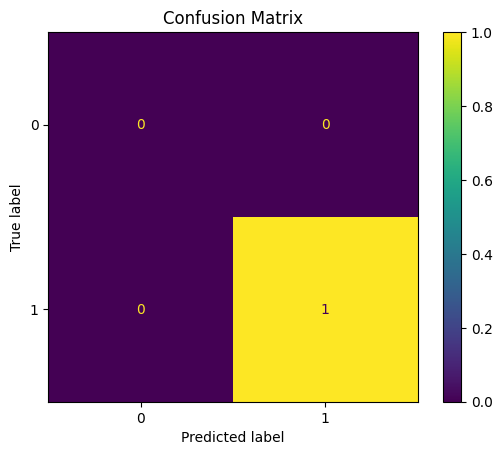

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='viridis')  # Same colormap as in your reference
plt.title("Confusion Matrix")
plt.show()

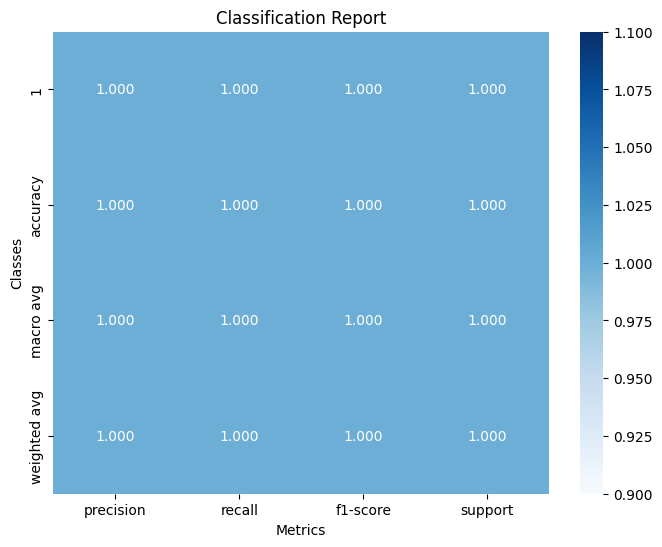

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt=".3f")

plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()